In [6]:
# Importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
#lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
#lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#lat_lngs = zip(lats, lngs)
#lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(68.76547212845682, 145.3675910200056),
 (83.07419712770579, 136.0852387843891),
 (89.48392394531223, -131.30805844251972),
 (-86.62591400888795, -158.33744981089637),
 (-22.9890297348164, 94.41619079027703),
 (30.93657083911029, -48.56282479236245),
 (-65.80905725838439, -170.36348113882488),
 (66.18948090751712, 73.39953501258807),
 (56.68269956060567, 24.038006870544848),
 (49.494734985244406, 123.62385996992532),
 (10.503868457627235, 163.91025481762438),
 (-45.694106070660524, -18.12664540200791),
 (65.80771652630963, -93.34330978009078),
 (19.585864675584176, 162.66433133532422),
 (62.93856762677734, 90.37374519829086),
 (-48.58508895564326, -158.34927134837002),
 (1.3022516667232935, -143.58157221845605),
 (30.627915989143744, 59.54468145416223),
 (19.456122022036652, 170.57817112090555),
 (-87.51318432637494, 89.11286648094438),
 (-25.22543775647472, 174.02762435411034),
 (-46.43004406913548, -74.96005428803765),
 (-13.0866399691715, 68.27881414809497),
 (-34.349799472863495, 

In [5]:
# Importing citipi to find the nearest cities
from citipy import citipy

In [6]:
city = citipy.nearest_city(66.1839315988822, 0.9301151358887978)
city

In [7]:
city.city_name

'raudeberg'

In [8]:
city.country_code

'no'

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [11]:
cities

['belaya gora',
 'nizhneyansk',
 'tuktoyaktuk',
 'mataura',
 'carnarvon',
 'saint george',
 'vaini',
 'staryy nadym',
 'olaine',
 'alihe',
 'butaritari',
 'jamestown',
 'thompson',
 'teya',
 'atuona',
 'bam',
 'albany',
 'vao',
 'coihaique',
 'grand gaube',
 'ahipara',
 'cabo san lucas',
 'sola',
 'yellowknife',
 'sangar',
 'taolanaro',
 'boende',
 'faro',
 'barentsburg',
 'tsogni',
 'coxim',
 'novobirilyussy',
 'bathsheba',
 'nguiu',
 'amazar',
 'ponta do sol',
 'avarua',
 'cabo rojo',
 'fort nelson',
 'cayenne',
 'hermanus',
 'makinsk',
 'kapaa',
 'maceio',
 'kasugai',
 'orlik',
 'bahia blanca',
 'clyde river',
 'yerbogachen',
 'rikitea',
 'vestmannaeyjar',
 'conceicao do araguaia',
 'ushuaia',
 'busselton',
 'lasa',
 'kavaratti',
 'moyale',
 'port elizabeth',
 'port hawkesbury',
 'soyo',
 'puerto ayora',
 'longyearbyen',
 'mar del plata',
 'tingo maria',
 'chuy',
 'lorengau',
 'basco',
 'nantucket',
 'filingue',
 'shenjiamen',
 'cape town',
 'bredasdorp',
 'qaanaaq',
 'uige',
 'aira

In [7]:
# Importing the requests library
import requests

# Importing the API key
from config import weather_api_key

# Importing the datetime module
from datetime import datetime

In [18]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [23]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belaya gora
Processing Record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | saint george
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | staryy nadym
Processing Record 9 of Set 1 | olaine
Processing Record 10 of Set 1 | alihe
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | teya
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | bam
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | vao
Processing Record 19 of Set 1 | coihaique
Processing Record 20 of Set 1 | grand gaube
Processing Record 21 of Set 1 | ahipara
Processing Record 22 of Set 1 | cabo san lucas
Processing Recor

Processing Record 39 of Set 4 | mendoza
Processing Record 40 of Set 4 | san patricio
Processing Record 41 of Set 4 | mogadishu
Processing Record 42 of Set 4 | iranshahr
Processing Record 43 of Set 4 | torbay
Processing Record 44 of Set 4 | faanui
Processing Record 45 of Set 4 | provideniya
Processing Record 46 of Set 4 | mangaratiba
Processing Record 47 of Set 4 | zhigansk
Processing Record 48 of Set 4 | olinda
Processing Record 49 of Set 4 | dikson
Processing Record 50 of Set 4 | pouembout
Processing Record 1 of Set 5 | cidreira
Processing Record 2 of Set 5 | antofagasta
Processing Record 3 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 4 of Set 5 | labuhan
Processing Record 5 of Set 5 | yambio
Processing Record 6 of Set 5 | axim
Processing Record 7 of Set 5 | vredendal
Processing Record 8 of Set 5 | vila velha
Processing Record 9 of Set 5 | margate
Processing Record 10 of Set 5 | putina
Processing Record 11 of Set 5 | tombouctou
Processing Record 12 of Set 5 | kat

Processing Record 31 of Set 8 | fortuna
Processing Record 32 of Set 8 | morros
Processing Record 33 of Set 8 | burnie
Processing Record 34 of Set 8 | kabale
Processing Record 35 of Set 8 | geraldton
Processing Record 36 of Set 8 | gayny
Processing Record 37 of Set 8 | aflu
City not found. Skipping...
Processing Record 38 of Set 8 | namwala
Processing Record 39 of Set 8 | zelenoborskiy
Processing Record 40 of Set 8 | amderma
City not found. Skipping...
Processing Record 41 of Set 8 | klaksvik
Processing Record 42 of Set 8 | songea
Processing Record 43 of Set 8 | volnovakha
Processing Record 44 of Set 8 | fomboni
Processing Record 45 of Set 8 | bayji
Processing Record 46 of Set 8 | san policarpo
Processing Record 47 of Set 8 | burica
City not found. Skipping...
Processing Record 48 of Set 8 | auki
Processing Record 49 of Set 8 | rock sound
Processing Record 50 of Set 8 | nalut
Processing Record 1 of Set 9 | monroe
Processing Record 2 of Set 9 | pingliang
Processing Record 3 of Set 9 | mi

Processing Record 20 of Set 12 | woodstock
Processing Record 21 of Set 12 | lodja
Processing Record 22 of Set 12 | westport
Processing Record 23 of Set 12 | huilong
Processing Record 24 of Set 12 | yulara
Processing Record 25 of Set 12 | linchuan
City not found. Skipping...
Processing Record 26 of Set 12 | esna
Processing Record 27 of Set 12 | amuntai
Processing Record 28 of Set 12 | port hueneme
Processing Record 29 of Set 12 | saint paul
Processing Record 30 of Set 12 | channel-port aux basques
Processing Record 31 of Set 12 | tiznit
Processing Record 32 of Set 12 | kiunga
Processing Record 33 of Set 12 | burns lake
Processing Record 34 of Set 12 | muisne
Processing Record 35 of Set 12 | assai
Processing Record 36 of Set 12 | hokitika
Processing Record 37 of Set 12 | pahrump
Processing Record 38 of Set 12 | ilhabela
Processing Record 39 of Set 12 | hailey
Processing Record 40 of Set 12 | portland
Processing Record 41 of Set 12 | ostrovnoy
Processing Record 42 of Set 12 | sitio novo d

In [24]:
len(city_data)

589

In [25]:
len(cities)

633

In [26]:
city_data

[{'City': 'Belaya Gora',
  'Lat': 68.5333,
  'Lng': 146.4167,
  'Max Temp': 64.9,
  'Humidity': 31,
  'Cloudiness': 10,
  'Wind Speed': 11.56,
  'Country': 'RU',
  'Date': '2021-05-31 21:03:14'},
 {'City': 'Tuktoyaktuk',
  'Lat': 69.4541,
  'Lng': -133.0374,
  'Max Temp': 33.31,
  'Humidity': 75,
  'Cloudiness': 97,
  'Wind Speed': 11.45,
  'Country': 'CA',
  'Date': '2021-05-31 21:03:14'},
 {'City': 'Mataura',
  'Lat': -46.1927,
  'Lng': 168.8643,
  'Max Temp': 38.46,
  'Humidity': 96,
  'Cloudiness': 65,
  'Wind Speed': 2.86,
  'Country': 'NZ',
  'Date': '2021-05-31 21:03:15'},
 {'City': 'Carnarvon',
  'Lat': -24.8667,
  'Lng': 113.6333,
  'Max Temp': 62.53,
  'Humidity': 68,
  'Cloudiness': 0,
  'Wind Speed': 14.85,
  'Country': 'AU',
  'Date': '2021-05-31 21:03:15'},
 {'City': 'Saint George',
  'Lat': 37.1041,
  'Lng': -113.5841,
  'Max Temp': 99.07,
  'Humidity': 9,
  'Cloudiness': 1,
  'Wind Speed': 5.01,
  'Country': 'US',
  'Date': '2021-05-31 20:58:29'},
 {'City': 'Vaini',
  '

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Belaya Gora,68.5333,146.4167,64.90,31,10,11.56,RU,2021-05-31 21:03:14
1,Tuktoyaktuk,69.4541,-133.0374,33.31,75,97,11.45,CA,2021-05-31 21:03:14
2,Mataura,-46.1927,168.8643,38.46,96,65,2.86,NZ,2021-05-31 21:03:15
3,Carnarvon,-24.8667,113.6333,62.53,68,0,14.85,AU,2021-05-31 21:03:15
4,Saint George,37.1041,-113.5841,99.07,9,1,5.01,US,2021-05-31 20:58:29
5,Vaini,-21.2000,-175.2000,73.11,80,100,9.78,TO,2021-05-31 21:03:16
6,Staryy Nadym,65.6118,72.6842,39.29,57,6,7.61,RU,2021-05-31 21:03:16
7,Olaine,56.7853,23.9381,51.82,81,0,1.41,LV,2021-05-31 21:03:17
8,Alihe,50.5667,123.7167,53.24,99,100,12.15,CN,2021-05-31 21:03:17
9,Butaritari,3.0707,172.7902,83.59,77,76,19.15,KI,2021-05-31 21:03:18


In [28]:
# Rearranging the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

rearranged_city_data_df = city_data_df[new_column_order]

In [30]:
rearranged_city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Belaya Gora,RU,2021-05-31 21:03:14,68.5333,146.4167,64.90,31,10,11.56
1,Tuktoyaktuk,CA,2021-05-31 21:03:14,69.4541,-133.0374,33.31,75,97,11.45
2,Mataura,NZ,2021-05-31 21:03:15,-46.1927,168.8643,38.46,96,65,2.86
3,Carnarvon,AU,2021-05-31 21:03:15,-24.8667,113.6333,62.53,68,0,14.85
4,Saint George,US,2021-05-31 20:58:29,37.1041,-113.5841,99.07,9,1,5.01
...,...,...,...,...,...,...,...,...,...
584,Gazli,UZ,2021-05-31 21:06:46,40.1333,63.4500,88.11,14,0,11.30
585,Nizwa,OM,2021-05-31 21:06:46,22.9333,57.5333,88.68,23,99,4.14
586,Chimoio,MZ,2021-05-31 21:06:46,-19.1164,33.4833,55.92,90,88,1.30
587,Matehuala,MX,2021-05-31 21:06:47,23.6500,-100.6500,84.96,30,99,10.83


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
rearranged_city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# First new cell for second half of modules
# Importing CSV file
city_data_df = pd.read_csv('weather_data/cities.csv')
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

Text(0.5, 0, 'latitude')

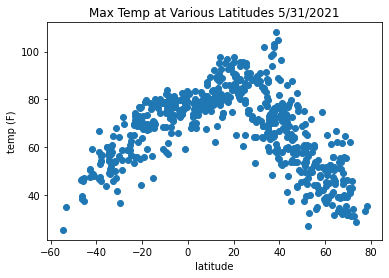

In [13]:
# Creating a scatter plot to chart the temp and lat
plt.scatter(lats, max_temps)
plt.title("Max Temp at Various Latitudes 5/31/2021")
plt.ylabel("temp (F)")
plt.xlabel("latitude")

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1622644077.0932853

In [16]:
today = time.strftime("%x")
today

'06/02/21'

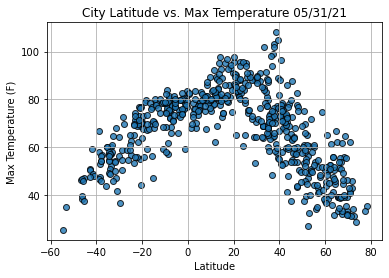

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
# Changed chart title to 5/31/2021 since that's when the data was queried and the CSV saved
plt.title("City Latitude vs. Max Temperature 05/31/21")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

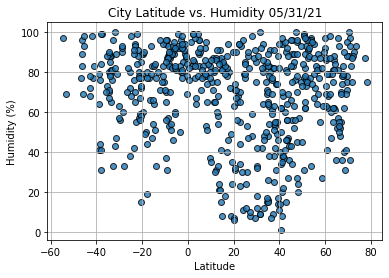

In [25]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
# Changed chart title to 5/31/2021 since that's when the data was queried and the CSV saved
plt.title("City Latitude vs. Humidity 05/31/21")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

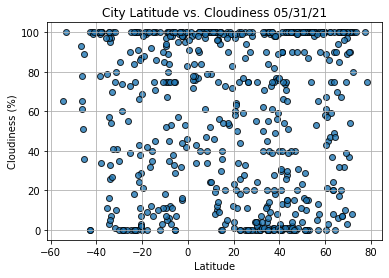

In [26]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
# Changed chart title to 5/31/2021 since that's when the data was queried and the CSV saved
plt.title("City Latitude vs. Cloudiness 05/31/21")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

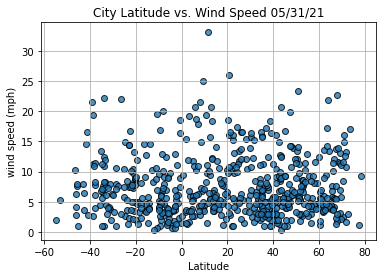

In [27]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
# Changed chart title to 5/31/2021 since that's when the data was queried and the CSV saved
plt.title("City Latitude vs. Wind Speed 05/31/21")
plt.ylabel("wind speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [43]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [44]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                       Atuona
Country                        PF
Date          2021-05-31 21:03:19
Lat                          -9.8
Lng                     -139.0333
Max Temp                    78.96
Humidity                       70
Cloudiness                     97
Wind Speed                   9.64
Name: 13, dtype: object

In [45]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
584     True
585     True
586    False
587     True
588     True
Name: Lat, Length: 589, dtype: bool

In [46]:
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

In [47]:
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

In [48]:
southern_hemi_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,2,Mataura,NZ,2021-05-31 21:03:15,-46.1927,168.8643,38.46,96,65,2.86
3,3,Carnarvon,AU,2021-05-31 21:03:15,-24.8667,113.6333,62.53,68,0,14.85
5,5,Vaini,TO,2021-05-31 21:03:16,-21.2000,-175.2000,73.11,80,100,9.78
13,13,Atuona,PF,2021-05-31 21:03:19,-9.8000,-139.0333,78.96,70,97,9.64
16,16,Vao,NC,2021-05-31 21:03:20,-22.6667,167.4833,70.70,55,100,16.75
...,...,...,...,...,...,...,...,...,...,...
578,578,Te Anau,NZ,2021-05-31 21:06:44,-45.4167,167.7167,37.38,93,36,0.98
580,580,Perth,AU,2021-05-31 21:06:44,-31.9333,115.8333,50.05,100,75,3.94
582,582,Mount Gambier,AU,2021-05-31 21:06:45,-37.8333,140.7667,46.08,41,100,8.28
583,583,Hualmay,PE,2021-05-31 21:06:45,-11.0964,-77.6139,68.43,78,90,10.54


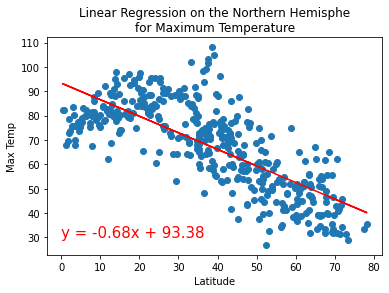

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphe\nfor Maximum Temperature', 'Max Temp',(0,30))

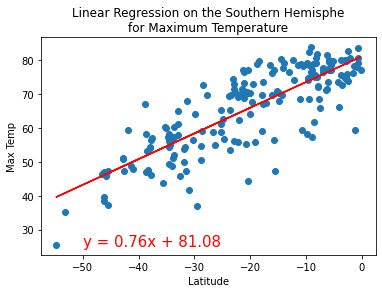

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphe\nfor Maximum Temperature', 'Max Temp',(-50,25))

In [69]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
northern_hemi_temp_r_value = r_value
northern_hemi_temp_r_value

-0.7533725264000528

In [110]:
southern_hemi_temp_r_value

0.8214526201947924

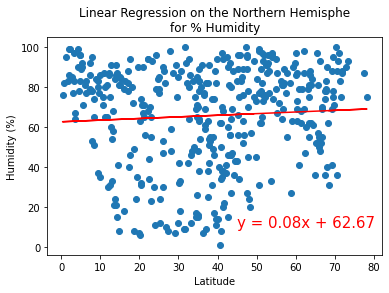

In [77]:
# Linear regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphe\nfor % Humidity', 'Humidity (%)',(45,10))

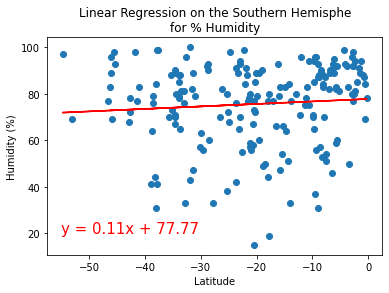

In [82]:
# Linear regression on the Southern Hemisphere Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphe\nfor % Humidity', 'Humidity (%)',(-55,20))

In [89]:
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
southern_hemi_hum_r_value = r_value
southern_hemi_hum_r_value

0.0801022499342753

In [109]:
northern_hemi_hum_r_value

0.06414138765736273

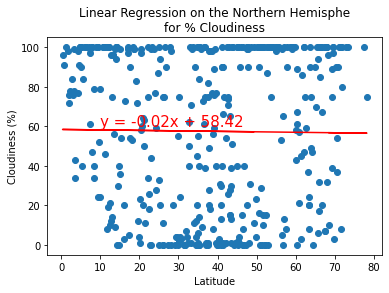

In [91]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphe\nfor % Cloudiness', 'Cloudiness (%)',(10,60))

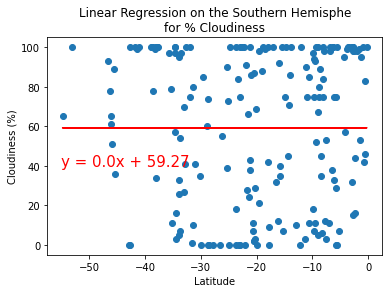

In [96]:
# Linear regression on the Southern Hemisphere Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphe\nfor % Cloudiness', 'Cloudiness (%)',(-55,40))

In [101]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
northern_hemi_cloud_r_value = r_value
northern_hemi_cloud_r_value

-0.012019978280888736

In [108]:
southern_hemi_cloud_r_value

0.0003491605194148604

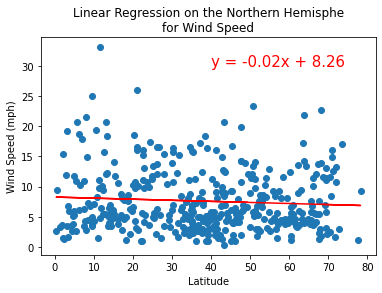

In [103]:
# Linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphe\nfor Wind Speed', 'Wind Speed (mph)',(40,30))

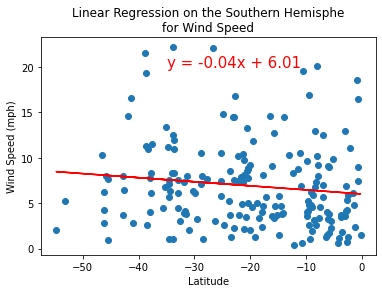

In [105]:
# Linear regression on the Southern Hemisphere Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphe\nfor Wind Speed', 'Wind Speed (mph)',(-35,20))

In [106]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
northern_hemi_wind_r_value = r_value
northern_hemi_wind_r_value

-0.06877495686315628

In [107]:
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
southern_hemi_wind_r_value = r_value
southern_hemi_wind_r_value

-0.12853836060008655